<a href="https://colab.research.google.com/github/missjanki/NLP_PROJECT/blob/main/Language_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

**LOADING DATASET**

In [ ]:
dataset = pd.read_csv('/content/Language Detection.csv')
dataset.sample(5)

,Text,Language
7993,"İngilizce konuşulan bir ülkeye, bunu tamamen k...",Turkish
6597,делать предложения.,Russian
1186,it sinks you say pull yourself together like l...,English
311,"""[53] Varma added that ""While Wikipedia's mana...",English
7018,"Jeg ville elske at gøre noget, men det kan jeg...",Danish


In [ ]:
df = dataset.copy()
df.sample(5)

,Text,Language
8453,[54] I en jämförelse utförd av Svenska Dagblad...,Sweedish
5959,χθες το βράδυ μαμά ήταν ένα τόσο υπέροχο όνειρ...,Greek
3589,"En 2015, une image 3D de la même volumétrie 20...",French
499,The study was limited to those articles that c...,English
7233,"Il gruppo più attivo, composto da quasi 10 000...",Italian


In [ ]:
df.shape

(10337, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

**DATA PREPROCESSING**

In [ ]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [ ]:
len(df[df.duplicated()])

66

In [ ]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [ ]:
df.shape

(10271, 2)

In [ ]:
df['Language'].value_counts(sort=False)

English       1382
Malayalam      591
Hindi           62
Tamil          464
Portugeese     736
French        1007
Dutch          542
Spanish        816
Greek          358
Russian        688
Danish         424
Italian        694
Turkish        471
Sweedish       673
Arabic         532
German         465
Kannada        366
Name: Language, dtype: int64

**DATA VISUALIZATION OF DATASET**

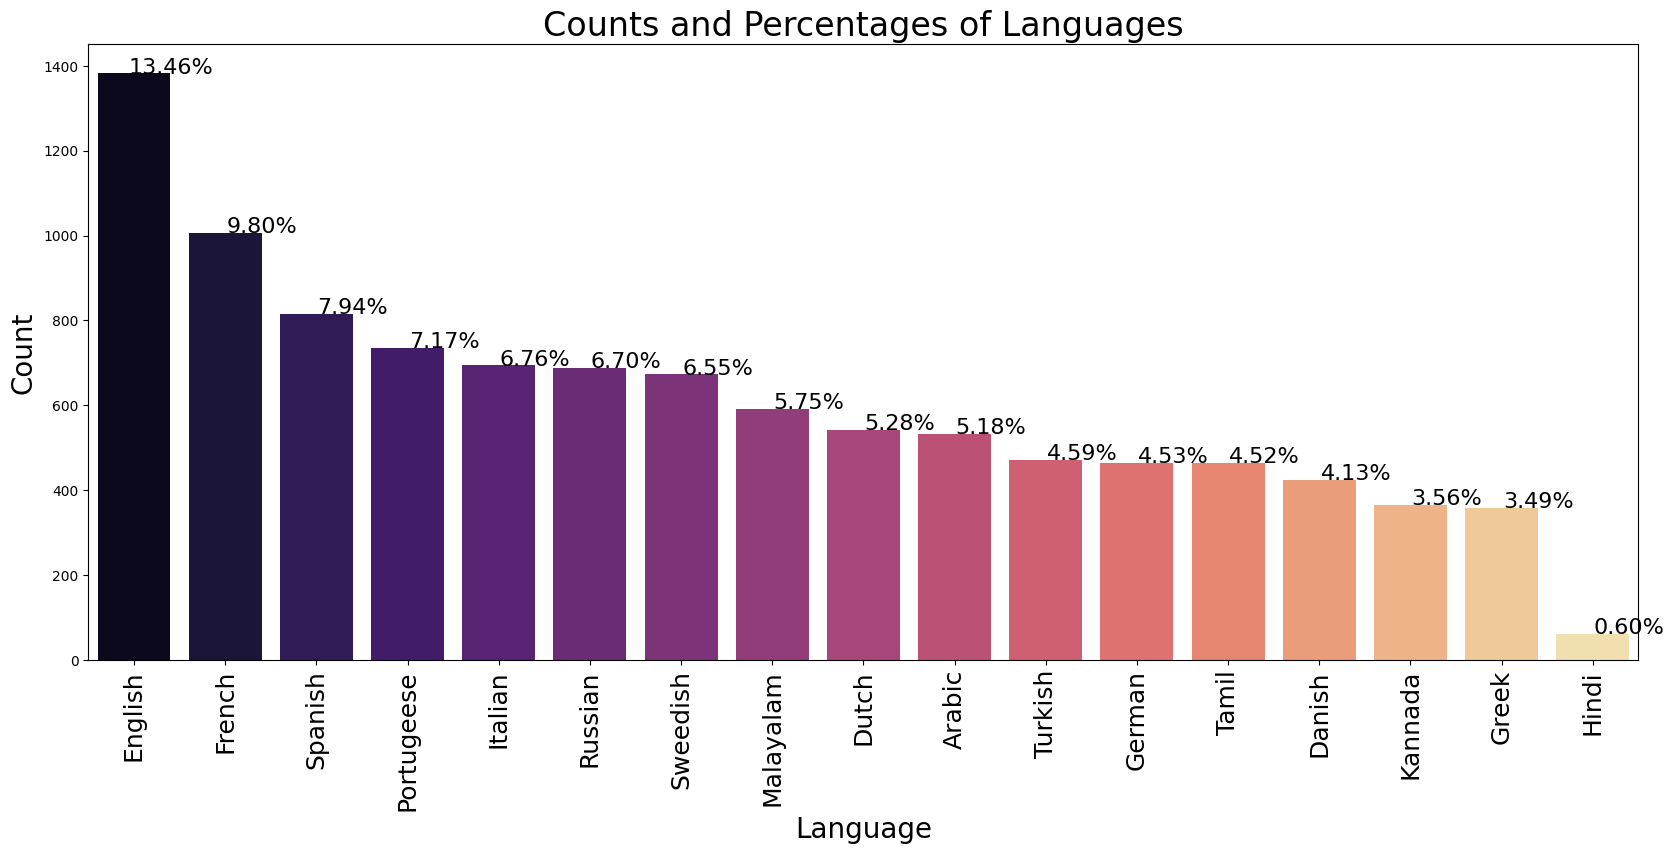

In [ ]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')

plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90)
plt.show()

In [ ]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


**TEXT PREPROCESSING**

In [ ]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


**REMOVING NUMBERS AND SYMBOLS FROM TEXT**

In [ ]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

    return Text

In [ ]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


**FEATURE SELECTION**

In [ ]:
#Text data is the independent variable and the language name is the dependent variable.

X= df1["cleaned_Text"]
y= df1["Language"]

**LABEL ENCODING**

In [ ]:
#Language names make up our output variable, which is a categorical variable. We are conducting label encoding on that output variable because we should need to turn it into a numerical form for training the model. We are importing LabelEncoder from sklearn for this procedure.

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)


**USING BAG OF WORDS ON TEXT**

In [ ]:
#As is common knowledge, both the input and the output features must be in numerical form. Therefore, using CountVectorizer to build a Bag of Words model, we are converting text into numerical form.

from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

**SPLITTING DATASET INTO TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()
}

**MODEL TRAINING**

In [ ]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: user 2min 18s, sys: 586 ms, total: 2min 19s
Wall time: 2min 19s


**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [ ]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.524
Random Forest accuracy score :  0.929
MNB accuracy score :  0.981
CPU times: user 1min 32s, sys: 3.04 s, total: 1min 35s
Wall time: 59.2 s


In [ ]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
       

K-Nearest Neighbors ConfusionMatrix


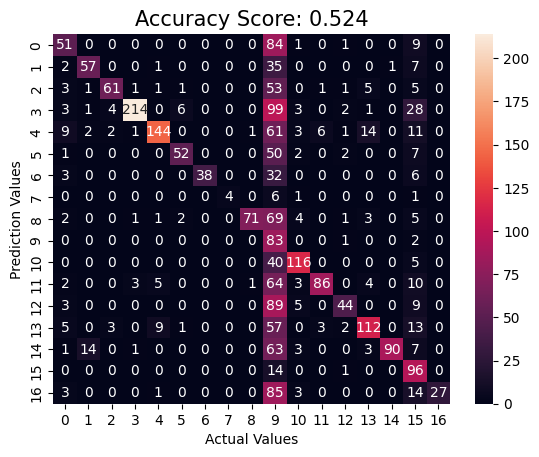

******************************
 
Random Forest ConfusionMatrix


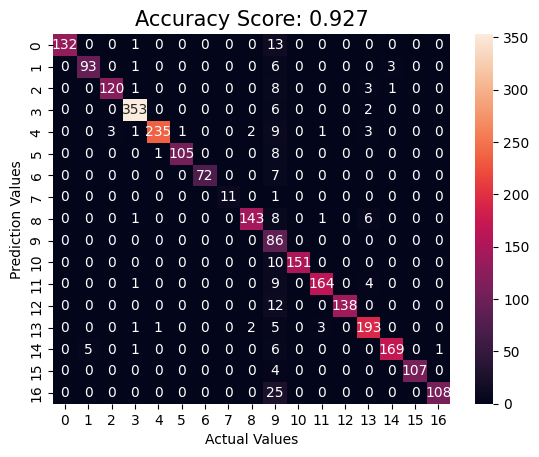

******************************
 
MNB ConfusionMatrix


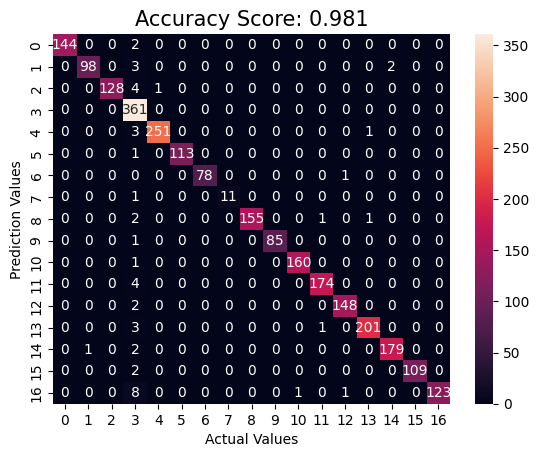

******************************
 


In [ ]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

**LANGUAGE DETECTION**

In [ ]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("{}".format(lang[0]))

In [ ]:
prediction("Pri unum aliquam definitionem ei, dicant reprehendunt cu nec. Intellegat accommodare ea usu. Ius illum delenit quaerendum ei, pri assum nobis id, iriure deseruisse deterruisset ad nam")

 Italian 


In [ ]:
prediction("एक बेहतरीन किताब 100 अच्छे दोस्त के बराबर है, लेकिन एक सर्वश्रेष्ठ दोस्त पुस्तकालय के बराबर है।")

 Hindi 


In [ ]:
prediction("സ്നേഹം, ആശ്വാസം, സഹായം – കുടുംബത്തിന്റെ അടിസ്ഥാനം.")

 Malayalam 


In [ ]:
prediction("Wees de verandering die je in de wereld wil zien gebeuren.")

 Dutch 


In [ ]:
prediction("أَوَلَا أَدُلُّكُم على شَيء إذا فَعَلْتُمُوهُ تَحَابَبْتُم؟، أَفْشوا السلام بينكم» النبي محمد “صلى الله عليه وسلم.")

 Arabic 


In [ ]:
prediction("Há males que vêm para o bem.")

 Portugeese 


In [ ]:
prediction("Друг познается в беде.")

 Russian 


In [ ]:
prediction("Friendship is the hardest thing in the world to explain. It's not something you learn in school. But if you haven't learned the meaning of friendship, you really haven't learned anything.")

 English 


In [ ]:
prediction("La famille est le noyau de la civilisation.")

 French 
